# Naive Bayes Classification 
2 Classes

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

<H1>Read Data from CSV

In [2]:
dfTrain = pd.read_csv('../input/ClassificationDS/ClassificationData.csv')   #Training Dataset
dfTrain.head()

,X1,X2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
DistinctClasses=np.array(dfTrain['Y'].unique())
print(DistinctClasses)

[0 1]


<h5> Visualize Data

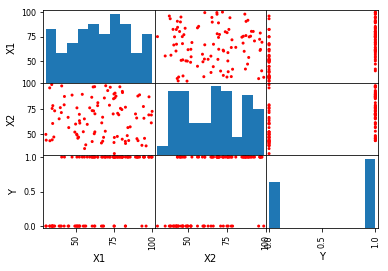

In [4]:
pd.plotting.scatter_matrix(dfTrain, alpha=1, diagonal='hist',color='r')
plt.show()

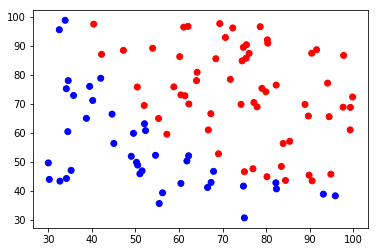

In [5]:
cmap = ListedColormap(['blue', 'red']) 



plt.scatter(dfTrain.loc[:,['X1']].values,dfTrain.loc[:,['X2']].values, c=dfTrain.loc[:,['Y']].values, cmap=cmap)
plt.show()

<h2>Extract Input Feature to <b>X </b>and Label to <b>Y</b></h2>
<h5>X=(X1 &amp; X2 in DS) and Y(Class in DS)   

In [6]:
def extractFeatures(df):
    df_Features=df.iloc[:,0:2]
    df_Label=df.iloc[:,2:3]
    X=df_Features.values
    Y=df_Label.values
    return X,Y

In [7]:
X,Y=extractFeatures(dfTrain)

In [8]:
def NaiveBayesClassifier(X,Y,Xtest):

    M0=np.mean(X[np.where(Y==0)[0]],axis=0)
    M1=np.mean(X[np.where(Y==1)[0]],axis=0)
    S0=np.std(X[np.where(Y==0)[0]],axis=0,ddof=1)
    S1=np.std(X[np.where(Y==1)[0]],axis=0,ddof=1)
    Ytest=np.zeros((Xtest.shape[0],1))
  
    for i in range(len(Xtest[:,0:1])): 
        Prob_X0_Y0= norm.pdf(Xtest[i,0],loc=M0[0], scale=S0[0])
        Prob_X0_Y1= norm.pdf(Xtest[i,0],loc=M1[0], scale=S1[0])
        Prob_X1_Y0= norm.pdf(Xtest[i,1],loc=M0[1], scale=S0[1])
        Prob_X1_Y1= norm.pdf(Xtest[i,1],loc=M1[1], scale=S1[1])
        Prob_Y0_X1X2 =(Prob_X0_Y0 *Prob_X1_Y0)/((Prob_X0_Y0 *Prob_X1_Y0)+(Prob_X0_Y1 *Prob_X1_Y1))
        Prob_Y1_X1X2 =(Prob_X0_Y1 *Prob_X1_Y1)/((Prob_X0_Y0 *Prob_X1_Y0)+(Prob_X0_Y1 *Prob_X1_Y1))
        if (Prob_Y1_X1X2>Prob_Y0_X1X2):
            Ytest[i]=1
        
    return Ytest

<h1> Prediction/Accuracy Evaluation

<h5>Accurracy on Training Data

In [9]:
def accurracy(Y1,Y2):
    m=np.mean(np.where(Y1==Y2,1,0))    
    return m*100

<h3>Predict using NaiveBayes

In [10]:
K=25
pY=NaiveBayesClassifier(X,Y,X) 
print(accurracy(Y, pY))

89.0


<h1>Plotting Hypothesis

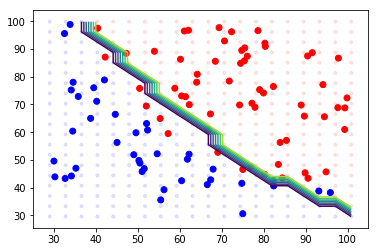

In [11]:
plt.scatter(X[:,0],X[:,1], c=Y[:,0], cmap=cmap) 
###########################################################################
#Predict for each X1 and X2 in Grid 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
u = np.linspace(x_min, x_max, 20) 
v = np.linspace(y_min, y_max, 20) 

U,V=np.meshgrid(u,v)
UV=np.column_stack((U.flatten(),V.flatten())) 
W=NaiveBayesClassifier(X,Y,UV) 
plt.scatter(U.flatten(), V.flatten(),  c=W.flatten(), cmap=cmap,marker='.', alpha=0.1)

###########################################################################
#Exact Decision Boundry can be plot with contour
z = np.zeros(( len(u), len(v) )) 
for i in range(len(u)): 
    for j in range(len(v)): 
        uv= np.column_stack((np.array([[u[i]]]),np.array([[v[j]]])))               
        z[i,j] =NaiveBayesClassifier(X,Y,uv) 
z = np.transpose(z) 
plt.contour(u, v, z)
###########################################################################
plt.show()

In [12]:

 
def plotNormalSurface(X,y):   
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')  
  
    M0=np.mean(X[np.where(y==0)[0]],axis=0)
    M1=np.mean(X[np.where(y==1)[0]],axis=0)
    S0=np.std(X[np.where(y==0)[0]],axis=0,ddof=1)
    S1=np.std(X[np.where(y==1)[0]],axis=0,ddof=1)
    V0=np.var(X[np.where(y==0)[0]],axis=0,ddof=1)
    V1=np.var(X[np.where(y==1)[0]],axis=0,ddof=1)
    
    x_min= M0[0]-4*S0[0]
    x_max =M0[0]+4*S0[0]
    y_min = M0[1]-4*S0[1]
    y_max = M0[1]+4*S0[1]
    u = np.linspace(x_min, x_max,50) 
    v = np.linspace(y_min, y_max,50) 
    

    U, V = np.meshgrid(u,v)
    pos = np.empty(U.shape + (2,))
    pos[:, :, 0] = U; pos[:, :, 1] = V

    rv = multivariate_normal([M0[0], M0[1]], [[V0[0], 0], [0, V0[1]]])
    W=rv.pdf(pos)

    ax.plot_surface(U,V,W,alpha=0.5, cmap='viridis',linewidth=0)



    rv = multivariate_normal([M1[0], M1[1]], [[V1[0], 0], [0, V1[1]]])
    W=rv.pdf(pos)

    ax.plot_surface(U,V,W,alpha=0.5,cmap='viridis',linewidth=0)

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    
    
    plt.show()



    return



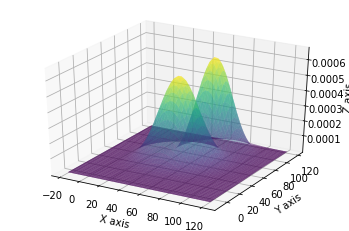

In [13]:
plotNormalSurface(X,Y)